In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

In [2]:
income = np.loadtxt("https://raw.githubusercontent.com/gagolews/" +
    "teaching-data/master/marek/uk_income_simulated_2020.txt")
b = [0, 10000, 20000, 30000, 40000, 50000, 60000, 80000, np.inf]  # bin bounds
c = np.histogram(income, bins=b)[0]  # counts
for i in range(len(c)):
    print(f"{b[i]:5}-{b[i+1]:5}: {c[i]:4}")

    0-10000:   29
10000-20000:  207
20000-30000:  263
30000-40000:  196
40000-50000:  117
50000-60000:   74
60000-80000:   64
80000-  inf:   50


In [3]:
heights = np.loadtxt("https://raw.githubusercontent.com/gagolews/" +
    "teaching-data/master/marek/nhanes_adult_female_height_2020.txt")
heights_sorted = np.sort(heights)
heights_sorted[0], heights_sorted[-1]

(131.1, 189.3)

In [4]:
np.mean(income), np.median(income)

(35779.994, 30042.0)

The arithmetic mean is strongly influenced by very large or very small observations (which in some contexts we refer to as outliers). For instance, assume that we are adding one billionaire to the income dataset:

In [5]:
income2 = np.append(income, [1_000_000_000])
np.mean(income2), np.median(income2)

(1034745.2487512487, 30076.0)

## Quantiles & Standard Deviation

In [6]:
np.quantile(income, [0, 0.25, 0.5, 0.75, 1])

array([  5750.  ,  20669.75,  30042.  ,  44123.75, 199969.  ])

In [7]:
np.quantile(heights, [0, 0.25, 0.5, 0.75, 1])

array([131.1, 155.3, 160.1, 164.8, 189.3])

In [8]:
# STD Deviation & IQR for income

np.std(income), np.quantile(income, 0.75)-np.quantile(income, 0.25)

(22888.77122437908, 23454.0)

In [9]:
np.std(heights), np.quantile(heights, 0.75)-np.quantile(heights, 0.25)

(7.062021850008261, 9.5)

## Box (& Whisker) Plots
The box and whisker plot (or the box plot for short) depicts some of the most noteworthy features of a data sample.

Box plots will be particularly useful for comparing data samples with each other (e.g., heights of men and women separately).

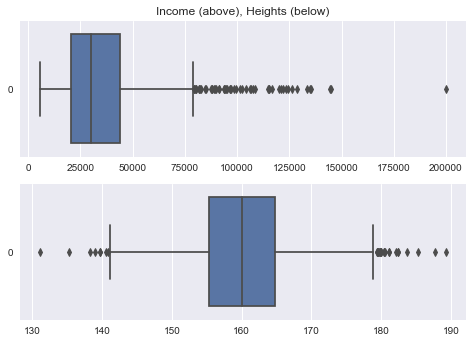

In [15]:
plt.subplot(211)  # 2 rows, 1 column, 1st subplot
sns.boxplot(data=income, orient="h")
plt.title("Income (above), Heights (below)")

plt.subplot(212)  # 2 rows, 1 column, 2nd subplot
sns.boxplot(data=heights, orient="h")

plt.show()

We may also sometimes be interested in a violin plot, which combines the box plot (although with no outliers marked) and the so-called kernel density estimator (which is a smoothened version of a histogram):

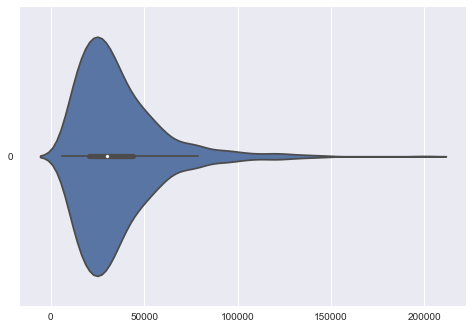

In [16]:
sns.violinplot(data=income, orient="h");

## Measures of Shape (*)

Note that from a histogram or a box plot, we can easily deduce if a dataset is symmetric or skewed.
It turns out that we can also give a numerical summary of such a feature.

In [18]:
import scipy.stats
scipy.stats.skew(heights)

# is thus an instance of almost-symmetric distribution. Slight left skew.

0.0811184528074054

In [19]:
# Income is right skewed

scipy.stats.skew(income)

1.9768735693998942